In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
%run ~/Dropbox/GNNpaper/posts/function_proposed_gcn.py

In [3]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [4]:
merged_df = pd.read_csv('./240326_meged.csv')
merged_df = merged_df[merged_df['model'] != 'WeightedEnsemble_L2']

In [5]:
merged_df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
0,ECOD,0.003704,0.591404,0.003553,0.843750,0.007076,0.717359,False,pyod,0.097074,10010,amt,0.450350,37088,0.001726,NaN,NaN,NaN
1,GMM,0.082634,0.692003,0.003410,0.609375,0.006782,0.650760,False,pyod,0.097074,10010,amt,0.450350,37088,0.001726,NaN,NaN,NaN
2,HBOS,0.002123,0.936368,0.020868,0.781250,0.040650,0.858943,False,pyod,0.097074,10010,amt,0.450350,37088,0.001726,NaN,NaN,NaN
3,IForest,0.144727,0.815358,0.007263,0.781250,0.014393,0.798334,False,pyod,0.097074,10010,amt,0.450350,37088,0.001726,NaN,NaN,NaN
4,INNE,0.326223,0.766636,0.005070,0.687500,0.010065,0.727136,False,pyod,0.097074,10010,amt,0.450350,37088,0.001726,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,LODA,1.380267,0.990775,0.000000,0.000000,0.000000,0.499843,False,pyod,0.009000,500499,amt,0.009029,166834,0.008913,NaN,NaN,NaN
1657,LOF,1.171791,0.982414,0.001378,0.001345,0.001361,0.496291,False,pyod,0.009000,500499,amt,0.009029,166834,0.008913,NaN,NaN,NaN
1658,MCD,0.101797,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009000,500499,amt,0.009029,166834,0.008913,NaN,NaN,NaN
1659,PCA,0.029553,0.990787,0.482782,0.471419,0.477033,0.733439,False,pyod,0.009000,500499,amt,0.009029,166834,0.008913,NaN,NaN,NaN


In [6]:
merged_df = merged_df[(merged_df['pre'] != 0) & (merged_df['rec'] != 0) & (merged_df['f1'] != 0)]

In [8]:
merged_df.sort_values(by='auc',ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
785,LightGBMLarge_BAG_L1,NaN,0.698585,0.000920,1.000000,0.001838,0.998890,False,Autogluon,0.500000,8409,amt,0.714116,3603,0.000278,NaN,NaN,NaN
838,LightGBMLarge,NaN,0.756869,0.001140,1.000000,0.002278,0.996530,False,Auto_not_best,0.500000,8409,amt,0.714116,3603,0.000278,NaN,NaN,NaN
835,NeuralNetFastAI,NaN,0.581460,0.000663,1.000000,0.001325,0.996113,False,Auto_not_best,0.500000,8409,amt,0.714116,3603,0.000278,NaN,NaN,NaN
829,LightGBM,NaN,0.762698,0.001168,1.000000,0.002334,0.994170,False,Auto_not_best,0.500000,8409,amt,0.714116,3603,0.000278,NaN,NaN,NaN
783,XGBoost_BAG_L1,NaN,0.751041,0.001114,1.000000,0.002225,0.994170,False,Autogluon,0.500000,8409,amt,0.714116,3603,0.000278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,PCA,0.002264,0.362902,0.000490,0.209302,0.000978,0.286217,False,pyod,0.117780,10010,amt,0.453047,28859,0.001490,NaN,NaN,NaN
551,PCA,0.002195,0.382297,0.000375,0.176471,0.000748,0.279519,False,pyod,0.125497,10010,amt,0.447453,25951,0.001310,NaN,NaN,NaN
193,PCA,0.002498,0.419414,0.000866,0.100000,0.001718,0.260509,False,pyod,0.300000,14014,amt,0.426431,6006,0.004995,NaN,NaN,NaN
1324,PCA,0.002321,0.230898,0.002240,0.281250,0.004444,0.255920,False,pyod,0.131955,9009,amt,0.498168,26215,0.006103,NaN,NaN,NaN


In [9]:
ex2 = merged_df[merged_df['train_frate'] <=0.5]

In [11]:
ex2.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
365,LightGBMLarge,NaN,0.969253,0.014235,1.000000,0.028070,0.993073,False,Auto_not_best,0.200000,21021,amt,0.285524,9009,0.000444,NaN,NaN,NaN
356,LightGBM,NaN,0.978688,0.015464,0.750000,0.030303,0.992018,False,Auto_not_best,0.200000,21021,amt,0.285524,9009,0.000444,NaN,NaN,NaN
1530,LightGBMLarge_BAG_L1,NaN,0.980464,0.016854,0.750000,0.032967,0.991838,False,Autogluon,0.200000,21021,amt,0.285524,9009,0.000444,NaN,NaN,NaN
1524,CatBoost_BAG_L1,NaN,0.976801,0.014218,0.750000,0.027907,0.991768,False,Autogluon,0.200000,21021,amt,0.285524,9009,0.000444,NaN,NaN,NaN
1521,LightGBM_BAG_L1,NaN,0.979021,0.015707,0.750000,0.030769,0.991546,False,Autogluon,0.200000,21021,amt,0.285524,9009,0.000444,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,PCA,0.002264,0.362902,0.000490,0.209302,0.000978,0.286217,False,pyod,0.117780,10010,amt,0.453047,28859,0.001490,NaN,NaN,NaN
551,PCA,0.002195,0.382297,0.000375,0.176471,0.000748,0.279519,False,pyod,0.125497,10010,amt,0.447453,25951,0.001310,NaN,NaN,NaN
193,PCA,0.002498,0.419414,0.000866,0.100000,0.001718,0.260509,False,pyod,0.300000,14014,amt,0.426431,6006,0.004995,NaN,NaN,NaN
1324,PCA,0.002321,0.230898,0.002240,0.281250,0.004444,0.255920,False,pyod,0.131955,9009,amt,0.498168,26215,0.006103,NaN,NaN,NaN


In [15]:
gcn = ex2[ex2['model'] == 'GCN'].sort_values(by='auc', ascending = False)

In [16]:
gcn

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
845,GCN,NaN,0.977689,0.709949,0.935556,0.807287,0.990954,True,Proposed,0.200000,21021,amt,0.264307,9009,0.050000,NaN,1.452800e+05,0.3
846,GCN,NaN,0.977356,0.699029,0.960000,0.808989,0.990922,True,Proposed,0.200000,21021,amt,0.264307,9009,0.050000,NaN,1.552800e+05,0.3
844,GCN,NaN,0.976912,0.696429,0.953333,0.804878,0.990892,True,Proposed,0.200000,21021,amt,0.264307,9009,0.050000,NaN,1.352800e+05,0.3
847,GCN,NaN,0.976912,0.699670,0.942222,0.803030,0.990838,True,Proposed,0.200000,21021,amt,0.264307,9009,0.050000,NaN,1.652800e+05,0.3
848,GCN,NaN,0.974803,0.673406,0.962222,0.792315,0.990807,True,Proposed,0.200000,21021,amt,0.264307,9009,0.050000,NaN,1.752800e+05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,GCN,NaN,0.795003,0.021974,0.784314,0.042750,0.869637,True,Proposed,0.131899,9009,amt,0.498723,26215,0.005836,NaN,2.510000e+07,0.5
1086,GCN,NaN,0.764753,0.018865,0.797297,0.036858,0.868959,True,Proposed,0.132069,9009,amt,0.499944,26215,0.005646,NaN,1.140700e+07,0.2
61,GCN,NaN,0.949189,0.085271,0.780645,0.153748,0.848454,True,Proposed,0.132268,9009,amt,0.499944,26215,0.005913,NaN,1.097300e+04,0.9
497,GCN,NaN,0.708068,0.013990,0.724832,0.027449,0.790459,True,Proposed,0.131189,9009,amt,0.496392,26215,0.005684,NaN,1.000000e+09,0.8


In [39]:
ex11 = merged_df[(merged_df['theta'] == 10000000) & (merged_df['throw_rate']  == 0.5) & (merged_df['model'] == 'GCN')]

In [40]:
ex11.shape

(15, 18)

In [43]:
ex11.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
643,GCN,NaN,0.966034,0.963887,0.968977,0.966425,0.985536,True,Proposed,0.5,9009,amt,0.498501,3003,0.504496,NaN,10000000.0,0.96
642,GCN,NaN,0.955045,0.953083,0.956288,0.954683,0.978829,True,Proposed,0.5,9009,amt,0.501610,3003,0.495171,NaN,10000000.0,0.94
641,GCN,NaN,0.958375,0.954045,0.964660,0.959323,0.978292,True,Proposed,0.5,9009,amt,0.497058,3003,0.508825,NaN,10000000.0,0.92
640,GCN,NaN,0.952381,0.939633,0.965610,0.952444,0.976409,True,Proposed,0.5,9009,amt,0.502054,3003,0.493839,NaN,10000000.0,0.90
639,GCN,NaN,0.950716,0.937139,0.966909,0.951792,0.975631,True,Proposed,0.5,9009,amt,0.498945,3003,0.503164,NaN,10000000.0,0.88
637,GCN,NaN,0.947386,0.930142,0.966398,0.947924,0.973762,True,Proposed,0.5,9009,amt,0.501499,3003,0.495504,NaN,10000000.0,0.84
638,GCN,NaN,0.946054,0.931717,0.963696,0.947437,0.970296,True,Proposed,0.5,9009,amt,0.498501,3003,0.504496,NaN,10000000.0,0.86
636,GCN,NaN,0.939727,0.914801,0.970957,0.942043,0.969211,True,Proposed,0.5,9009,amt,0.498501,3003,0.504496,NaN,10000000.0,0.82
633,GCN,NaN,0.938395,0.920382,0.960133,0.939837,0.966664,True,Proposed,0.5,9009,amt,0.499611,3003,0.501166,NaN,10000000.0,0.76
634,GCN,NaN,0.931735,0.907987,0.958839,0.932721,0.966264,True,Proposed,0.5,9009,amt,0.502165,3003,0.493506,NaN,10000000.0,0.78


In [57]:
ex11[0:-1]

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
630,GCN,NaN,0.922411,0.891892,0.962227,0.925725,0.954604,True,Proposed,0.5,9009,amt,0.499167,3003,0.502498,NaN,10000000.0,0.70
631,GCN,NaN,0.918748,0.890909,0.958279,0.923367,0.957870,True,Proposed,0.5,9009,amt,0.496392,3003,0.510823,NaN,10000000.0,0.72
632,GCN,NaN,0.925075,0.894510,0.964096,0.928000,0.958778,True,Proposed,0.5,9009,amt,0.499722,3003,0.500833,NaN,10000000.0,0.74
633,GCN,NaN,0.938395,0.920382,0.960133,0.939837,0.966664,True,Proposed,0.5,9009,amt,0.499611,3003,0.501166,NaN,10000000.0,0.76
634,GCN,NaN,0.931735,0.907987,0.958839,0.932721,0.966264,True,Proposed,0.5,9009,amt,0.502165,3003,0.493506,NaN,10000000.0,0.78
635,GCN,NaN,0.932734,0.915601,0.953395,0.934116,0.964429,True,Proposed,0.5,9009,amt,0.499944,3003,0.500167,NaN,10000000.0,0.80
636,GCN,NaN,0.939727,0.914801,0.970957,0.942043,0.969211,True,Proposed,0.5,9009,amt,0.498501,3003,0.504496,NaN,10000000.0,0.82
637,GCN,NaN,0.947386,0.930142,0.966398,0.947924,0.973762,True,Proposed,0.5,9009,amt,0.501499,3003,0.495504,NaN,10000000.0,0.84
638,GCN,NaN,0.946054,0.931717,0.963696,0.947437,0.970296,True,Proposed,0.5,9009,amt,0.498501,3003,0.504496,NaN,10000000.0,0.86
639,GCN,NaN,0.950716,0.937139,0.966909,0.951792,0.975631,True,Proposed,0.5,9009,amt,0.498945,3003,0.503164,NaN,10000000.0,0.88


In [51]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
def plot_auc_curve(df):
    filtered_df = df[(df['pre'] != 0) & (df['rec'] != 0) & (df['f1'] != 0)]
    max_auc_df = filtered_df.sort_values(by='auc', ascending=False)

    fig = px.bar(max_auc_df, x='gamma', y='auc',
                 hover_data=['throw_rate', 'train_frate', 'train_size', 'test_frate', 'test_size'],
                 labels={'auc': 'AUC', 'model': 'Model'},
                 title='AUC Value for Proposed Models',
                 color='model')

    fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

    fig.update_layout(
        xaxis=dict(tickangle=45),
        hovermode='closest',
    )

    
    fig.show()

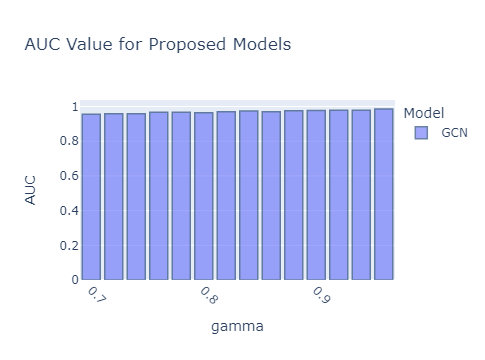

In [58]:
plot_auc_curve(ex11[0:-1])

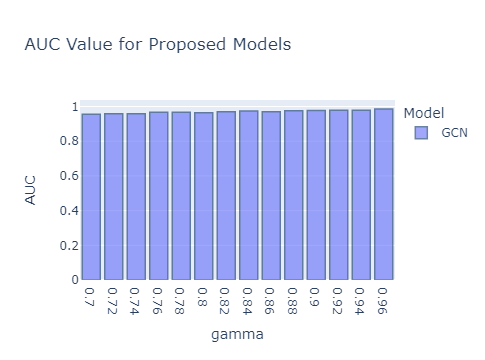

In [62]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

def plot_auc_curve(df):
    filtered_df = df[(df['pre'] != 0) & (df['rec'] != 0) & (df['f1'] != 0)]
    max_auc_df = filtered_df.sort_values(by='auc', ascending=False)

    fig = px.bar(max_auc_df, x='gamma', y='auc',
                 hover_data=['throw_rate', 'train_frate', 'train_size', 'test_frate', 'test_size'],
                 labels={'auc': 'AUC', 'model': 'Model'},
                 title='AUC Value for Proposed Models',
                 color='model')

    fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

    fig.update_layout(
        xaxis=dict(tickvals=max_auc_df['gamma'], ticktext=max_auc_df['gamma']),  # x축 눈금을 gamma 값으로 설정
        yaxis=dict(showticklabels=True),  # y축 눈금 모두 표시
        hovermode='closest',
    )

    fig.show()



plot_auc_curve(ex11[0:-1])  # df는 데이터프레임 객체로 대체되어야 합니다.


In [20]:
grouped_df = gcn.groupby('throw_rate').agg(list)
grouped_df

,model,time,acc,pre,rec,f1,auc,graph_based,method,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
throw_rate,,,,,,,,,,,,,,,,,
0.010000,[GCN],[nan],[0.9904362304362304],[0.7076923076923077],[0.1191709844559585],[0.2039911308203991],[0.8957701853090123],[True],[Proposed],[450450],[amt],[0.0099056499056499],[150150],[0.0102830502830502],[nan],[10000000.0],[0.8]
0.020000,[GCN],[nan],[0.9833100233100232],[0.726890756302521],[0.2355343771272975],[0.3557840616966581],[0.972261964504144],[True],[Proposed],[225225],[amt],[0.0201443001443001],[75075],[0.0195670995670995],[nan],[10000000.0],[0.8]
0.030000,[GCN],[nan],[0.9736263736263736],[0.6609442060085837],[0.2990291262135922],[0.411764705882353],[0.971024853474886],[True],[Proposed],[150150],[amt],[0.0297102897102897],[50050],[0.0308691308691308],[nan],[10000000.0],[0.8]
0.040000,[GCN],[nan],[0.9724545793595822],[0.7210953346855984],[0.4836734693877551],[0.5789902280130294],[0.9805390932018808],[True],[Proposed],[112612],[amt],[0.0402798991226512],[37538],[0.0391603175448878],[nan],[10000000.0],[0.8]
0.052000,"[GCN, GCN, GCN, GCN, GCN]","[nan, nan, nan, nan, nan]","[0.9672727272727272, 0.9672727272727272, 0.968...","[0.7647058823529411, 0.7647058823529411, 0.752...","[0.5362608117099135, 0.5362608117099135, 0.552...","[0.6304262807978099, 0.6304262807978099, 0.637...","[0.9833788631028654, 0.9833788631028654, 0.982...","[True, True, True, True, True]","[Proposed, Proposed, Proposed, Proposed, Propo...","[86625, 86625, 86625, 86625, 86625]","[amt, amt, amt, amt, amt]","[0.0519826839826839, 0.0519826839826839, 0.052...","[28875, 28875, 28875, 28875, 28875]","[0.052051948051948, 0.052051948051948, 0.05087...","[nan, nan, nan, nan, nan]","[10000000.0, 10000000.0, 10000000.0, 10000000....","[0.8, 0.8, 0.8, 0.8, 0.8]"
0.054000,"[GCN, GCN, GCN, GCN, GCN]","[nan, nan, nan, nan, nan]","[0.9687477522836798, 0.9687477522836798, 0.966...","[0.7897111913357401, 0.7897111913357401, 0.742...","[0.5790866975512905, 0.5790866975512905, 0.569...","[0.6681939671630394, 0.6681939671630394, 0.644...","[0.984616243258382, 0.984616243258382, 0.98258...","[True, True, True, True, True]","[Proposed, Proposed, Proposed, Proposed, Propo...","[83416, 83416, 83416, 83416, 83416]","[amt, amt, amt, amt, amt]","[0.0538865445478085, 0.0538865445478085, 0.054...","[27806, 27806, 27806, 27806, 27806]","[0.0543407897576062, 0.0543407897576062, 0.053...","[nan, nan, nan, nan, nan]","[10000000.0, 10000000.0, 10000000.0, 10000000....","[0.8, 0.8, 0.8, 0.8, 0.8]"
0.056000,"[GCN, GCN, GCN, GCN, GCN]","[nan, nan, nan, nan, nan]","[0.9661358296348788, 0.9687092082198934, 0.966...","[0.778584392014519, 0.7707061900610288, 0.7874...","[0.5637319316688568, 0.6054794520547945, 0.581...","[0.6539634146341463, 0.678174146528577, 0.6686...","[0.9845632709116086, 0.9833301049455658, 0.983...","[True, True, True, True, True]","[Proposed, Proposed, Proposed, Proposed, Propo...","[80437, 80437, 80437, 80437, 80437]","[amt, amt, amt, amt, amt]","[0.0557454902594577, 0.0565162798214751, 0.055...","[26813, 26813, 26813, 26813, 26813]","[0.0567635102375713, 0.0544511990452392, 0.057...","[nan, nan, nan, nan, nan]","[10000000.0, 10000000.0, 10000000.0, 10000000....","[0.8, 0.8, 0.8, 0.8, 0.8]"
0.058000,"[GCN, GCN, GCN, GCN, GCN]","[nan, nan, nan, nan, nan]","[0.9628012978986404, 0.9628012978986404, 0.962...","[0.7584973166368515, 0.7584973166368515, 0.732...","[0.5502920181700195, 0.5502920181700195, 0.558...","[0.6378337720947724, 0.6378337720947724, 0.633...","[0.9829077089955638, 0.9829077089955638, 0.978...","[True, True, True, True, True]","[Proposed, Proposed, Proposed, Proposed, Propo...","[77664, 77664, 77664, 77664, 77664]","[amt, amt, amt, amt, amt]","[0.0574912443345694, 0.0574912443345694, 0.058...","[25888, 25888, 25888, 25888, 25888]","[0.0595256489493201, 0.0595256489493201, 0.057...","[nan, nan, nan, nan, nan]","[10000000.0, 10000000.0, 10000000.0, 10000000....","[0.8, 0.8, 0.8, 0.8, 0.8]"
0.060

이거 어떻게 보냐? 킹쓰.